In [1]:
import numpy as np
import matplotlib.pyplot as plt
import importlib

# 우리가 만든 모듈들 불러오기
from utils.trajectory_generator import TrajectoryGenerator
from sensors.camera import CameraSensor
from sensors.lidar import LidarSensor
from sensors.imu import ImuSensor
from fusion.ekf import ExtendedKalmanFilter
from fusion.particle_filter import ParticleFilter

# 수정사항이 있을 경우를 대비해 리로드
import utils.trajectory_generator
importlib.reload(utils.trajectory_generator)

gen = TrajectoryGenerator(dt=0.1)
print("Setup Complete! 🚀")

Camera.py generated!!!!!!!!!!!!
generated lidar.py!!!!!!!!!
generated imu.py!!!!!!!!!!!
ekf.py 생성 완료! 🧠
particle_filter.py 생성 완료! 🎲
Setup Complete! 🚀


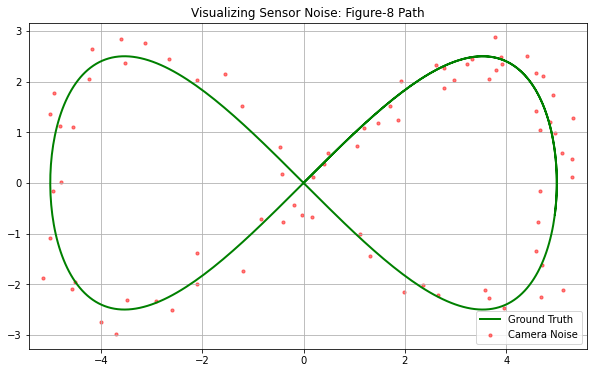

In [2]:
# 1. 경로 생성 및 센서 데이터 생성
true_path_8 = gen.generate_eight_shape(size=5.0, duration=40)
camera_8 = CameraSensor(noise_std=[0.3, 0.3, 0.1])
cam_data_8 = camera_8.observe(true_path_8)

# 2. 시각화
plt.figure(figsize=(10, 6))
plt.plot(true_path_8[:, 0], true_path_8[:, 1], 'g-', linewidth=2, label="Ground Truth")
plt.scatter(cam_data_8[::5, 0], cam_data_8[::5, 1], c='r', s=10, alpha=0.5, label="Camera Noise")
plt.title("Visualizing Sensor Noise: Figure-8 Path")
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()

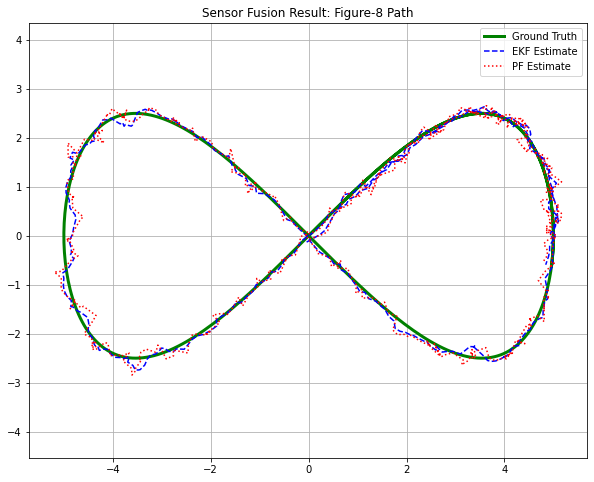

In [3]:
# 필터 및 센서 초기화
ekf = ExtendedKalmanFilter(dt=0.1)
pf = ParticleFilter(num_particles=500, dt=0.1)
imu = ImuSensor(dt=0.1)
lidar_8 = LidarSensor(noise_std=[0.1, 0.1, 0.03])

lidar_data_8 = lidar_8.observe(true_path_8)
imu_data_8 = imu.generate_measurements(true_path_8)

ekf_res, pf_res = [], []

for i in range(len(true_path_8)):
    u = [1.0, imu_data_8[i, 2]]
    ekf.predict(u); pf.predict(u)
    z_fused = (cam_data_8[i] + lidar_data_8[i]) / 2.0
    ekf.update(z_fused); pf.update(z_fused); pf.resample()
    ekf_res.append(ekf.x.copy()); pf_res.append(pf.estimate().copy())

# 시각화
plt.figure(figsize=(10, 8))
plt.plot(true_path_8[:, 0], true_path_8[:, 1], 'g-', linewidth=3, label="Ground Truth")
plt.plot(np.array(ekf_res)[:, 0], np.array(ekf_res)[:, 1], 'b--', label="EKF Estimate")
plt.plot(np.array(pf_res)[:, 0], np.array(pf_res)[:, 1], 'r:', label="PF Estimate")
plt.title("Sensor Fusion Result: Figure-8 Path")
plt.legend(); plt.axis('equal'); plt.grid(True)
plt.show()

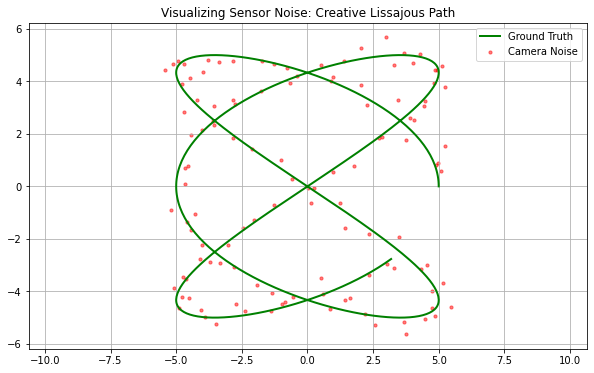

In [4]:
# 1. 리사주 경로 생성 (Creative Path)
true_path_liss = gen.generate_lissajous(A=5, B=5, a=3, b=2, duration=60)
cam_data_liss = camera_8.observe(true_path_liss) # 기존 카메라 객체 재사용

# 2. 시각화
plt.figure(figsize=(10, 6))
plt.plot(true_path_liss[:, 0], true_path_liss[:, 1], 'g-', linewidth=2, label="Ground Truth")
plt.scatter(cam_data_liss[::5, 0], cam_data_liss[::5, 1], c='r', s=10, alpha=0.5, label="Camera Noise")
plt.title("Visualizing Sensor Noise: Creative Lissajous Path")
plt.legend(); plt.axis('equal'); plt.grid(True)
plt.show()

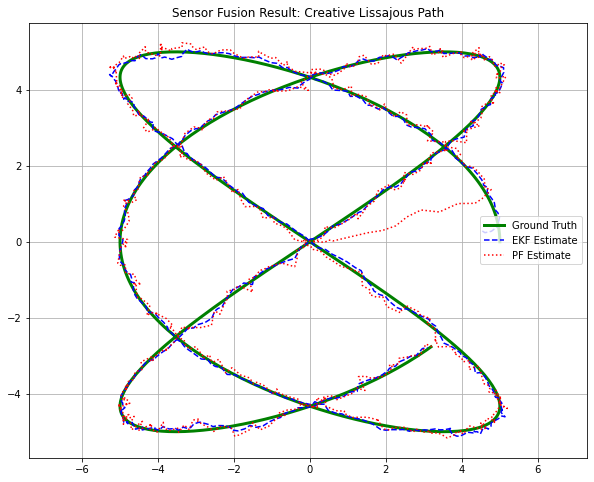

In [5]:
# 필터 초기화 (새 경로를 위해 리셋)
ekf_l = ExtendedKalmanFilter(dt=0.1)
pf_l = ParticleFilter(num_particles=500, dt=0.1)
lidar_data_liss = lidar_8.observe(true_path_liss)
imu_data_liss = imu.generate_measurements(true_path_liss)

ekf_res_l, pf_res_l = [], []

for i in range(len(true_path_liss)):
    u = [1.0, imu_data_liss[i, 2]]
    ekf_l.predict(u); pf_l.predict(u)
    z_fused = (cam_data_liss[i] + lidar_data_liss[i]) / 2.0
    ekf_l.update(z_fused); pf_l.update(z_fused); pf_l.resample()
    ekf_res_l.append(ekf_l.x.copy()); pf_res_l.append(pf_l.estimate().copy())

# 시각화
plt.figure(figsize=(10, 8))
plt.plot(true_path_liss[:, 0], true_path_liss[:, 1], 'g-', linewidth=3, label="Ground Truth")
plt.plot(np.array(ekf_res_l)[:, 0], np.array(ekf_res_l)[:, 1], 'b--', label="EKF Estimate")
plt.plot(np.array(pf_res_l)[:, 0], np.array(pf_res_l)[:, 1], 'r:', label="PF Estimate")
plt.title("Sensor Fusion Result: Creative Lissajous Path")
plt.legend(); plt.axis('equal'); plt.grid(True)
plt.show()